# Naive Bayes Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_excel('/content/drive/MyDrive/Python/NaiveBayesClassifier/dataset1.xlsx')
X = dataset.iloc[:, [1, 2,3,4]].values
y = dataset.iloc[:, -1].values

print(X)

[['Male' 19.0 19000.0 0.0]
 ['Male' 35.0 20000.0 0.0]
 ['Female' 26.0 43000.0 0.0]
 ...
 ['Female' 50.0 20000.0 1.0]
 ['Male' 36.0 33000.0 0.0]
 ['Female' 49.0 36000.0 1.0]]


Since our dataset containing character variables we have to encode it using LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

**Train test Split**

> We are performing a train test split on our dataset.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Next, we are doing feature scaling to the training and test set of independent variables**

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the Naive Bayes model on the training set**

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

**Let’s predict the test results**

In [10]:
y_pred  =  classifier.predict(X_test)

**Display Predicted and actual value**

In [11]:
y_pred 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.])

In [12]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.])

**Making Confusion Matrix**

>For the first 8 values, both are the same. We can evaluate our matrix using the confusion matrix and accuracy score by comparing the predicted and actual test values

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

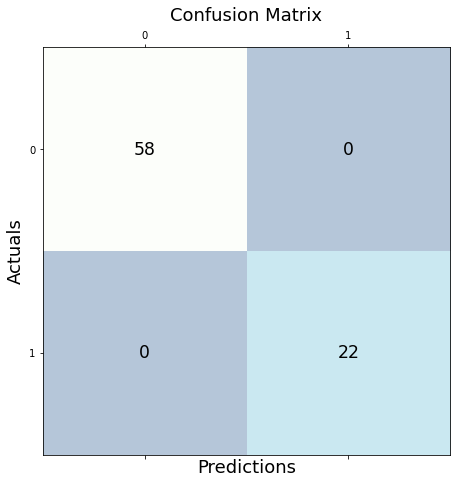

In [16]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.GnBu_r , alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [15]:
ac

1.0